# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
# Gather the html from the current page in the browser
html = browser.html

# soupify
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find("table", {"class": "table"})
dfs = pd.read_html(str(table))
df = dfs[0]

df

C:\Users\eeliz\AppData\Local\Temp\ipykernel_13860\2873021633.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
dfs = pd.read_html(str(table))
df = dfs[0]
df

C:\Users\eeliz\AppData\Local\Temp\ipykernel_13860\3213841628.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
rows = soup.find_all('tr', class_="data-row")

In [9]:
# Create an empty list
list_of_rows = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td')
    row_data = [col.text for col in td]
    list_of_rows.append(row_data)

# Create a DataFrame using the list_of_rows and specify the column names
df1 = pd.DataFrame(list_of_rows, columns=["id", "terresrial_date", "sol", "ls", "month", "min_temp", "pressure"])


In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [11]:
# Confirm DataFrame was created successfully
df1.head()

,id,terresrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [13]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [14]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
mars_month = df["month"].nunique()
mars_month

12

In [16]:
# 2. How many Martian days' worth of data are there?
mars_sol = df["sol"].nunique()
mars_sol

1867

In [17]:
# 3. What is the average low temperature by month?
avg_low_temp = df["min_temp"].mean()
avg_low_temp

-76.12104981253347

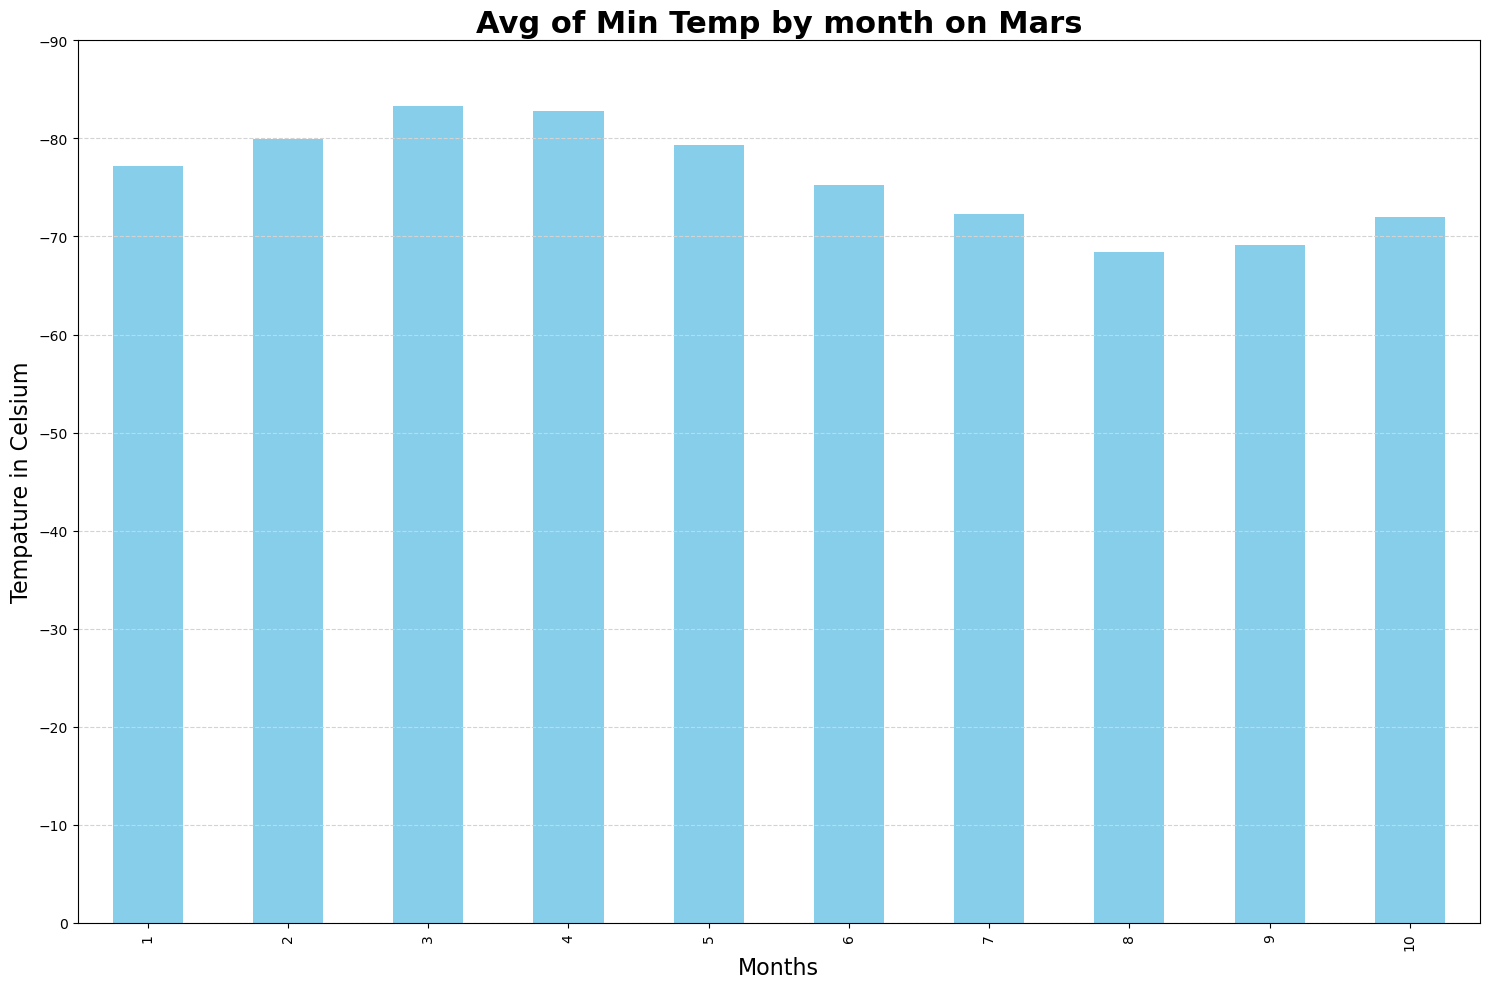

In [18]:
# Plot the average temperature by month
# Step 1: Get the data
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Step 2: Create the Canvas
plt.figure(figsize=(15,10))

# Step 3: Create the skeleton plot
avg_temp_by_month.plot(kind='bar', color='skyblue')

# Step 4: Customization
plt.title("Avg of Min Temp by month on Mars", fontweight="bold", fontsize=22)
plt.xlabel("Months", fontsize=16)
plt.ylabel("Tempature in Celsium", fontsize=16)
plt.xlim(-0.5, 9.5)
plt.ylim(0,-90)
plt.xticks(rotation="vertical")

plt.grid(axis="y", color="lightgrey", linestyle="--")

# Step 5: Show/Save
plt.tight_layout()
plt.show()

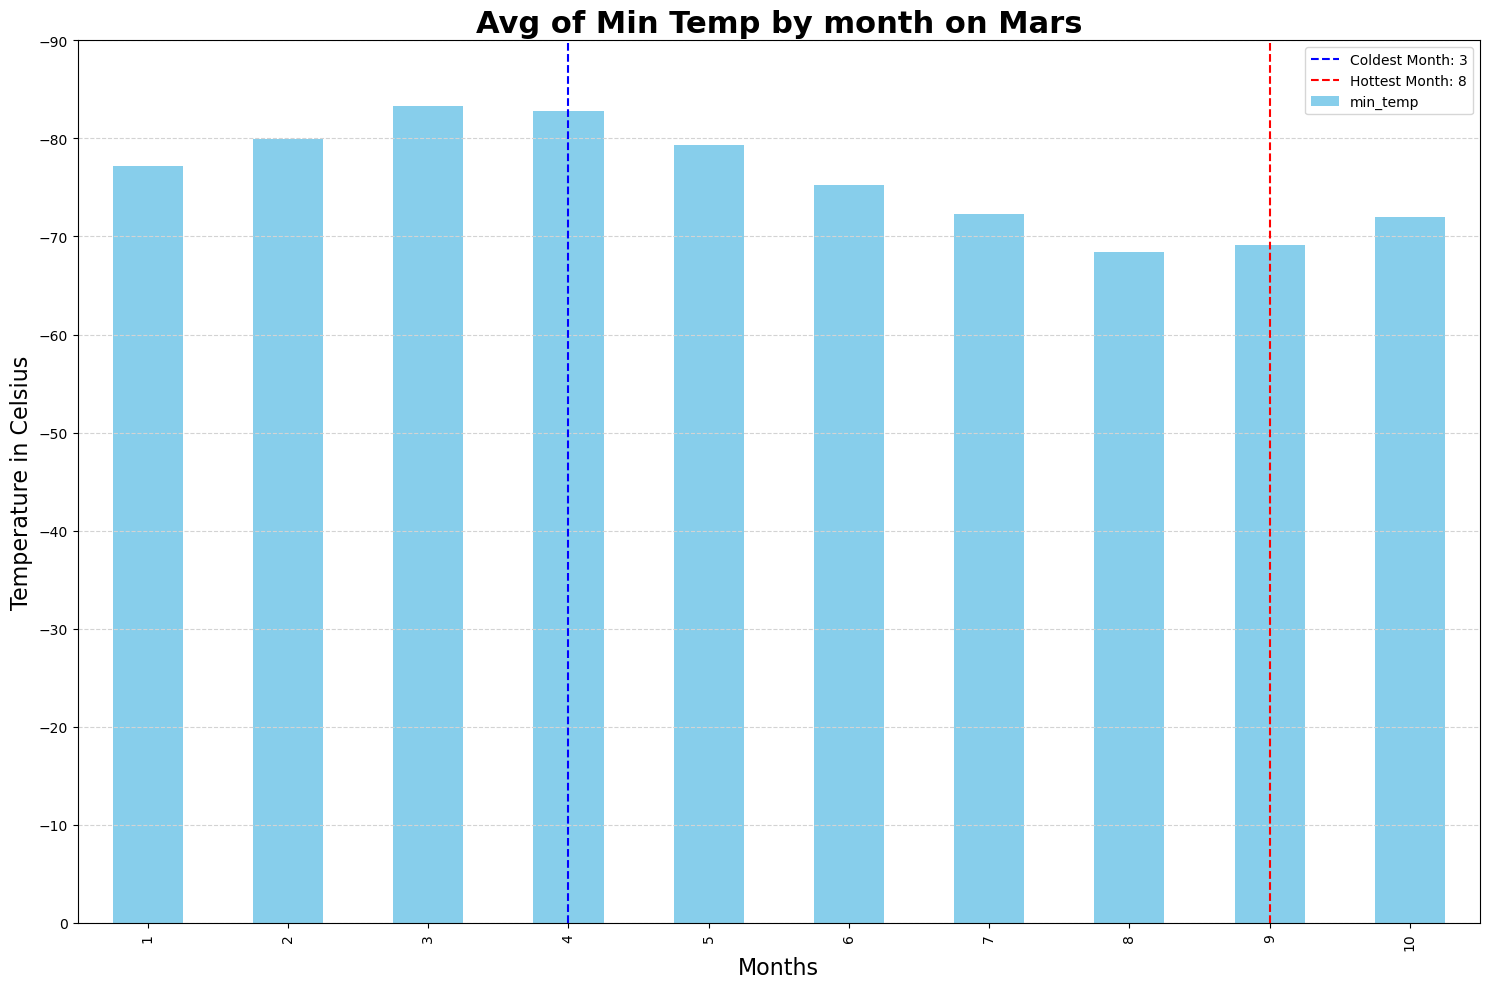

In [19]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_temp_by_month.idxmin()
hottest_month = avg_temp_by_month.idxmax()

# Plot the average temperature by month
plt.figure(figsize=(15,10))
avg_temp_by_month.plot(kind='bar', color='skyblue')

# Highlight the coldest and hottest months
plt.axvline(x=coldest_month, color='blue', linestyle='--', label=f'Coldest Month: {coldest_month}')
plt.axvline(x=hottest_month, color='red', linestyle='--', label=f'Hottest Month: {hottest_month}')

plt.title("Avg of Min Temp by month on Mars", fontweight="bold", fontsize=22)
plt.xlabel("Months", fontsize=16)
plt.ylabel("Temperature in Celsius", fontsize=16)
plt.xlim(-0.5, 9.5)
plt.ylim(0, -90)
plt.xticks(rotation="vertical")
plt.grid(axis="y", color="lightgrey", linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month.head()

month
1    862.488506
2    889.455056
3    877.322917
4    806.329897
5    748.557047
Name: pressure, dtype: float64

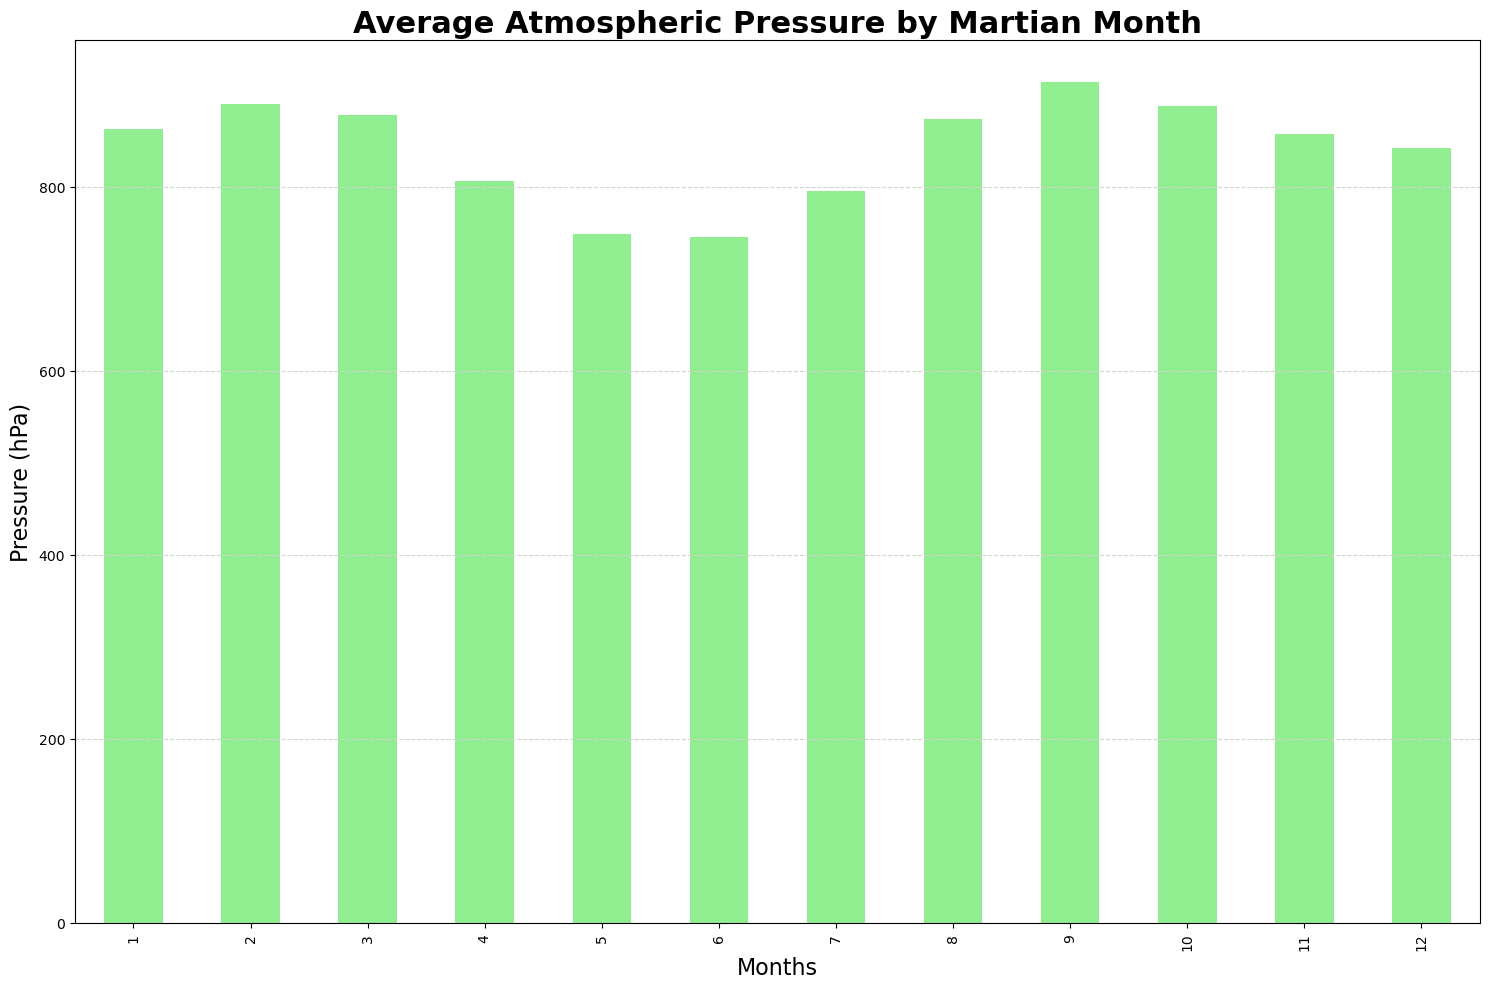

In [21]:
# Plot the average pressure by month
plt.figure(figsize=(15,10))
avg_pressure_by_month.plot(kind='bar', color='lightgreen')

# Customize the plot
plt.title("Average Atmospheric Pressure by Martian Month", fontweight="bold", fontsize=22)
plt.xlabel("Months", fontsize=16)
plt.ylabel("Pressure (hPa)", fontsize=16)
plt.xticks(rotation="vertical")
plt.grid(axis="y", color="lightgrey", linestyle="--")

plt.tight_layout()
plt.show()

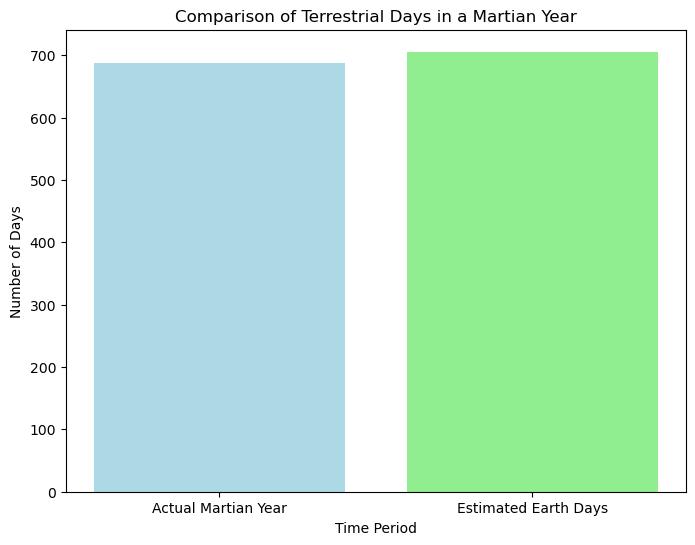

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Constants
martian_year_days = 687  # Number of Martian days in a Martian year
earth_day_length_ratio = 1.027  # Length of a Martian day in Earth days

# Calculate the number of Earth days in a Martian year
earth_days_in_martian_year = martian_year_days * earth_day_length_ratio

# Data for the bar plot
labels = ['Actual Martian Year', 'Estimated Earth Days']
days = [martian_year_days, earth_days_in_martian_year]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, days, color=['lightblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Time Period')
plt.ylabel('Number of Days')
plt.title('Comparison of Terrestrial Days in a Martian Year')

# Show the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
df.to_csv('output_file.csv', index=False)


In [24]:
browser.quit()